# Import Starting Data

In [1]:
import pandas as pd #1
import os           #3

In [2]:
given_data_folder = 'data'

file_names = os.listdir(given_data_folder)
file_names.sort()
file_names

['MMasseyOrdinals.csv',
 'MRegularSeasonDetailedResults.csv',
 'bracket-2022.csv']

In [3]:
file_name = 'MRegularSeasonDetailedResults.csv'

In [4]:
file_path = given_data_folder + '/' + file_name 
given_df  = pd.read_csv(file_path)
print(len(given_df))

given_df.head(5)

100423


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


# Imports

In [5]:
import sys
sys.path.append("..")

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

from time import time

In [7]:
#from network_matrix.population import Population
from network_matrix.population_v2 import Population
from network_matrix.data_prep     import *

from extra.progress_package import *

In [8]:
headers_list = [ "FG%2",  "FGA2",  "FG%3",  "FGA3",  "FT%",  "FTA",  
                   "OR",    "DR",   "Ast",    "TO",  "Stl",  "Blk",  "PF", 
                "xFG%2", "xFGA2", "xFG%3", "xFGA3", "xFT%", "xFTA", 
                  "xOR",   "xDR",  "xAst",   "xTO", "xStl", "xBlk", "xPF"]

In [9]:
def graph_progress(all_costs, all_accuracies, show_recents=True):
    # last 5 results
    # ---------------
    if show_recents:
        line1 = "cost: "
        line2 = "acc:  "
        for i in range(-5, 0):
            line1 += "{:>6} ".format(round(all_costs[i], 3))
            line2 += "{:>6}%".format(round(all_accuracies[i]*100, 2))
        print(line1)
        print(line2)


    # graphs
    # -------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].plot(range(len(all_costs)), all_costs, label="costs")
    axes[0].set_xlabel('step') # Set the y axis label of the current axis.
    axes[0].set_ylabel('cost') # Set a title of the current axes.
    axes[0].set_title('cost over training steps') 
    axes[0].legend() # show a legend on the plot

    axes[1].plot(range(len(all_accuracies)), all_accuracies, label="accuracies")
    axes[1].set_xlabel('step') # Set the y axis label of the current axis.
    axes[1].set_ylabel('accuracy') # Set a title of the current axes.
    axes[1].set_title('accuracy over training steps') 
    axes[1].legend() # show a legend on the plot

    return fig.tight_layout()
    

# Get inputs and outputs from a given season

### 2021

In [10]:
# inputs, solutions, output_max_columns, variance
inputs_2021, solutions_2021, max_2021, variance_2021 = separate_fga_and_fgp(given_df, 2021)

7228 7228
  FG%2    FGA   FG%3   FGA3    FT%    FTA     OR     DR    Ast     TO    Stl    Blk     PF 
  0.66   0.74   0.55    0.5   0.67   0.67   0.59   0.72   0.58   0.86   0.85   0.75    0.0 
  1.65%  1.79%  3.19%  2.73%   1.7%  4.12%  4.57%  1.95%  3.38%  3.26%  4.88%  7.04% 10.42%


### 2022

In [11]:
# inputs, solutions, output_max_columns, variance
inputs_2022, solutions_2022, max_2022, variance_2022 = separate_fga_and_fgp(given_df, 2022)

7036 7036
  FG%2    FGA   FG%3   FGA3    FT%    FTA     OR     DR    Ast     TO    Stl    Blk     PF 
  1.05   0.74   0.47   0.68   0.58   0.34   0.53   0.97   0.96   0.82   0.62   0.88   0.63 
  1.68%  1.83%  3.28%   2.7%  1.74%  4.31%  4.59%  2.04%  3.65%  3.27%  5.04%  7.76%  2.51%


### convert input data to numpy arrays

In [12]:
py_data = [inputs_2021, solutions_2021, inputs_2022, solutions_2022]
np_data = []

# inputs and outputs
# -------------------
for py_list in py_data:
    np_list = []
    for i in range(len(py_list)):
        np_list.append(np.array(py_list[i]).astype(np.float32, casting='unsafe', copy=True))
    np_data.append(np_list)

# max and variance
# -----------------
py_data2 = [max_2021, variance_2021, max_2022, variance_2022]
np_data2 = []
for py_list in py_data2:
    np_data2.append(np.array(py_list).astype(np.float32, casting='unsafe', copy=True))

np_max_2022 = np_data2[2]
np_max_2021 = np_data2[0]

# increasing importance of certain stats in the cost function
# ------------------------------------------------------------
increase = 4
important_stats_indicis = [0,1,2,3,4,5, 13,14,15,16,17,18]
for index in important_stats_indicis:
    py_data2[1][index] = (py_data2[1][index]/increase)
    py_data2[3][index] = (py_data2[3][index]/increase)



np_data = [np_data[0], np_data[1], np.multiply(np_data2[1], 100), 
           np_data[2], np_data[3], np.multiply(np_data2[3], 100)]

# Create and test population

In [13]:
#TEST_population = Population(52, 26, learning_rate=0.001)
TEST_population  = Population(52, 26, learning_rate=0.1)

all_times = [0,0,0,0,0]
all_costs = []
all_accuracies = []

### graphed performance

In [14]:
TEST_population.learning_rate = 0.05

In [19]:
# training loops
# ---------------
times, costs, accuracies = TEST_population.train_and_test(np_data, 40)

# update tracking
# ---------------
for i in range(len(all_times)):
    all_times[i] += times[i]
all_costs      += costs
all_accuracies += accuracies

Training Progress:                             |  cost     acc  |     steps           time      remaining  
                                               | ------  ------ | ----------  -------------  ------------- 


 
             time(s)   percent  per step       | steps:               80
            --------  --------  --------       | learning rate:     0.05
calc value     32.37     40.72%      0.4       | # connections:     4680
grad dscnt     39.37     49.53%     0.49       | L1 (sum):        -0.001
scoring         6.99      8.79%     0.09       | L2 (**2):        0.0063
step time       79.5     100.0%     0.99

cost:  1.015  1.015  1.015  1.015  1.015 
acc:   49.68% 49.64% 49.68% 49.67% 49.65%


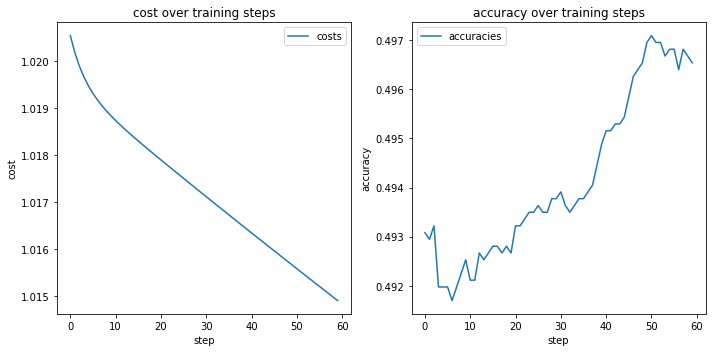

In [20]:
TEST_population.report_training_progress(all_times)     # timing
#graph_progress(all_costs, all_accuracies)               # graphs
graph_progress(all_costs[20:], all_accuracies[20:], show_recents=True) # graphs (recent)

In [17]:
game_id = 102
TEST_population.box_score_preview(np_data[3], np_data[4], np_data[5], game_id, np_max_2022, headers_list)

         FG%2   FGA2   FG%3   FGA3    FT%    FTA     OR     DR    Ast     TO    Stl    Blk     PF 
actual  0.463   41.0  0.481   27.0    0.6   15.0   11.0   26.0   23.0    9.0    6.0    5.0   17.0 
model   0.479   37.6   0.33   21.2  0.737   19.7   10.6   22.2   12.5   11.0    6.4    3.4    7.2 
        -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
cost      0.0    0.0   0.06   0.02   0.01   0.01    0.0   0.01    0.2    0.0    0.0   0.03   0.13 
var_c     0.0    0.0   0.01    0.0   0.01    0.0    0.0    0.0   0.05    0.0    0.0    0.0   0.05 

        xFG%2  xFGA2  xFG%3  xFGA3   xFT%   xFTA    xOR    xDR   xAst    xTO   xStl   xBlk    xPF 
actual -0.499  -22.0 -0.419  -31.0 -0.727  -11.0   -3.0  -22.0  -17.0  -15.0   -4.0   -2.0  -18.0 
model  -0.508  -40.8 -0.366  -21.9 -0.737  -18.5   -8.5  -21.5  -12.1  -12.5   -8.0   -3.3   -7.1 
        -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
cost     

In [18]:
TEST_population.print_magnitudes_report()


           abs_avg   abs_med       sum       max       min
          --------  --------  --------  --------  --------
values       0.329     0.288    -1.658     0.916    -0.737
biases       0.012     0.011     0.218     0.036    -0.032
weights      0.056     0.037    -4.081     0.386    -0.439
          --------  --------  --------  --------  --------
values       0.565     0.572    -0.154     0.737    -0.756
biases       0.048     0.043    -0.038       0.1    -0.089
weights      0.052     0.032    -0.366     0.365    -0.311
